# PROHI HT2024

## OCD Patient Dataset: Demographics & Clinical Data
Source of the data set: https://www.kaggle.com/datasets/ohinhaque/ocd-patient-dataset-demographics-and-clinical-data

### Basic EDA

#### 1. Loading and formatting

a) Load the dataset into a pandas DataFrame.

In [1]:
import pandas as pd
# Pandas provides built-in functions to load text files into DataFrames.
dataframe = pd.read_csv("ocd_patient_dataset.csv")
dataframe.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,15/07/2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,28/04/2017,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,02/02/2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,25/08/2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,20/02/2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


b) Check the total size of the dataset.

In [2]:
dataframe.shape

(1500, 17)

c) Check the variable types.

In [3]:
dataframe.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object

d) Make sure the data types per column are correct.

In [4]:
# Convert the nominal categorical variables
dataframe["Ethnicity"] = dataframe["Ethnicity"].astype("category")
dataframe["Marital Status"] = dataframe["Marital Status"].astype("category")
dataframe["Previous Diagnoses"] = dataframe["Previous Diagnoses"].astype("category")
dataframe["Obsession Type"] = dataframe["Obsession Type"].astype("category")
dataframe["Compulsion Type"] = dataframe["Compulsion Type"].astype("category")
dataframe["Medications"] = dataframe["Medications"].astype("category")

# Boolean
dataframe["Gender"] = dataframe["Gender"].map({"Male": True, "Female": False})
dataframe["Gender"] = dataframe["Gender"].astype("bool")
dataframe["Family History of OCD"] = dataframe["Family History of OCD"].map({"Yes": True, "No": False})
dataframe["Family History of OCD"] = dataframe["Family History of OCD"].astype("bool")
dataframe["Depression Diagnosis"] = dataframe["Depression Diagnosis"].map({"Yes": True, "No": False})
dataframe["Depression Diagnosis"] = dataframe["Depression Diagnosis"].astype("bool")
dataframe["Anxiety Diagnosis"] = dataframe["Anxiety Diagnosis"].map({"Yes": True, "No": False})
dataframe["Anxiety Diagnosis"] = dataframe["Anxiety Diagnosis"].astype("bool")


In [5]:
# Convert the ordinal categorical variables
# Creating a list with the desired order
categ = ["High School", "Some College", "College Degree", "Graduate Degree"]
# Assigning the ordinal category
dataframe["Education Level"] = pd.Categorical(dataframe["Education Level"], categories=categ, ordered=True)

In [6]:
# Drop columns which aren't needed
dataframe.drop(columns=["OCD Diagnosis Date"], inplace=True)

In [7]:
dataframe.dtypes

Patient ID                          int64
Age                                 int64
Gender                               bool
Ethnicity                        category
Marital Status                   category
Education Level                  category
Duration of Symptoms (months)       int64
Previous Diagnoses               category
Family History of OCD                bool
Obsession Type                   category
Compulsion Type                  category
Y-BOCS Score (Obsessions)           int64
Y-BOCS Score (Compulsions)          int64
Depression Diagnosis                 bool
Anxiety Diagnosis                    bool
Medications                      category
dtype: object

### 2. Processing pipeline

a) Impute missing values

-> In this case, the dataset does not contain missing values and therefore there is no need to impute any values.

In [8]:
dataframe.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

b) Rename columns (if wanted)

c) Create a file with processed data

In [9]:
df = dataframe
df.to_csv("./depression_dataset_processed.csv", index=False)

---

### Tab 1: Descriptive Analytics

`Question 1:` What is the total amount of patients in the dataset? + How many have a depression diagnosis?

to make it interactive: 
- display a single value card showing the total number of patients
- add filters (dropdowns or checkboxes) for gender, age group, and ethnicity, so users can filter the number of patients by these categories

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Calculate the total number of patients
total_patients = df.shape[0]
print(f"Total number of patients: {total_patients}")

Total number of patients: 1500


In [12]:
# Count the number of patients with a depression diagnosis
depression_count = df[df['Depression Diagnosis'] == True].shape[0]
print(f"Number of patients with a depression diagnosis: {depression_count}")

Number of patients with a depression diagnosis: 772


Percentage of patients with a depression diagnosis: 51.47%


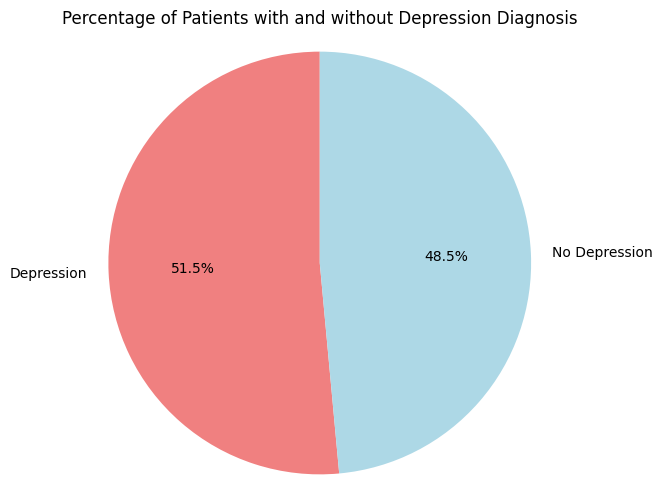

In [13]:
# Total number of patients
total_patients = df.shape[0]

# Number of patients with a depression diagnosis
depression_count = df[df['Depression Diagnosis'] == True].shape[0]

# Calculate the percentage
depression_percentage = (depression_count / total_patients) * 100

print(f"Percentage of patients with a depression diagnosis: {depression_percentage:.2f}%")

# Values for the pie chart
values = [depression_count, total_patients - depression_count]
labels = ['Depression', 'No Depression']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Percentage of Patients with and without Depression Diagnosis')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

`Question 2:` Which age group of OCD patients has the highest rate of depression diagnosis? (-> most at risk of developing depression)

to make it interactive: 
- allow the user to hover over the bar chart to get precise values
    - show total number in age group + part which is diagnosed with depression
    - show percentage in age group

C:\Users\katja\AppData\Local\Temp\ipykernel_63920\3233939237.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_depression.index, y=age_depression.values, palette='coolwarm')


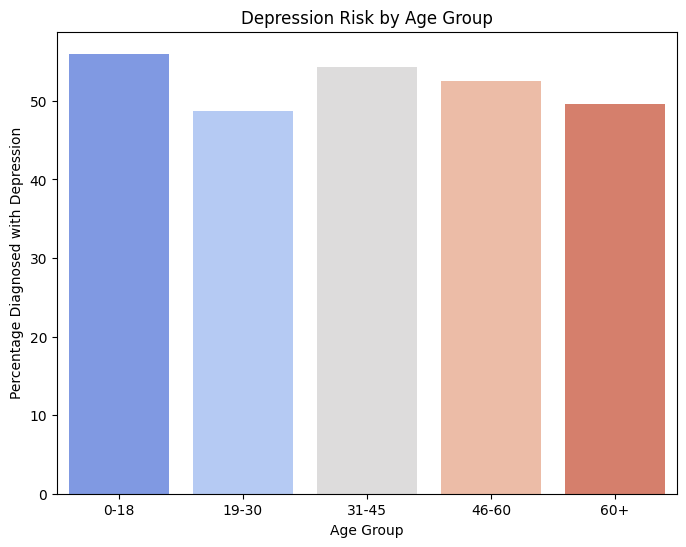

In [14]:
# Create age bins to group patients by age
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by age group and calculate the percentage of patients with depression
age_depression = df.groupby('age_group')['Depression Diagnosis'].mean() * 100

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=age_depression.index, y=age_depression.values, palette='coolwarm')
plt.title('Depression Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage Diagnosed with Depression')
plt.show()

`Question 3:` What is the prevalence of depression diagnosis among men and women? 

to add for interactivity:
- Checkbox to toggle the display of men/women or both

Percentage of men with a depression diagnosis: 52.06%
Percentage of women with a depression diagnosis: 50.87%


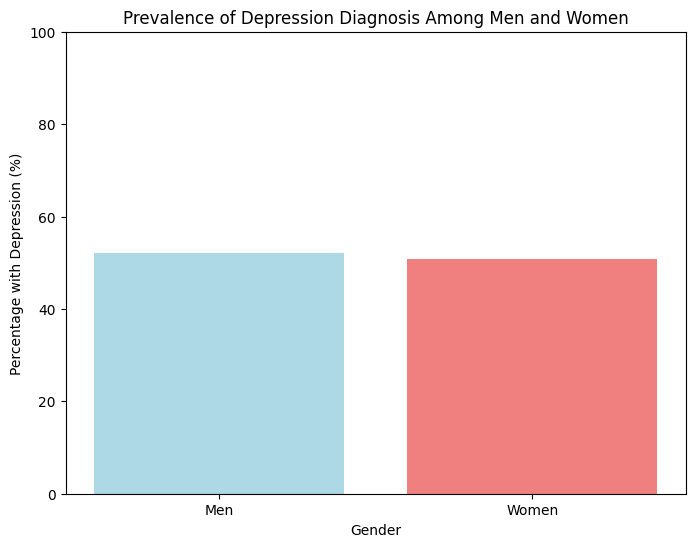

In [16]:
# 'Gender' is boolean: True = Male, False = Female

# Total number of male and female patients
total_men = df[df['Gender'] == True].shape[0]
total_women = df[df['Gender'] == False].shape[0]

# Number of men and women with a depression diagnosis
men_with_depression = df[(df['Gender'] == True) & (df['Depression Diagnosis'] == True)].shape[0]
women_with_depression = df[(df['Gender'] == False) & (df['Depression Diagnosis'] == True)].shape[0]

# Calculate the percentage of men and women with a depression diagnosis
men_depression_percentage = (men_with_depression / total_men) * 100 if total_men != 0 else 0
women_depression_percentage = (women_with_depression / total_women) * 100 if total_women != 0 else 0

# Print the results
print(f"Percentage of men with a depression diagnosis: {men_depression_percentage:.2f}%")
print(f"Percentage of women with a depression diagnosis: {women_depression_percentage:.2f}%")

# Bar chart for visualizing the prevalence of depression in men and women
gender_labels = ['Men', 'Women']
depression_percentages = [men_depression_percentage, women_depression_percentage]

plt.figure(figsize=(8, 6))
plt.bar(gender_labels, depression_percentages, color=['lightblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Percentage with Depression (%)')
plt.title('Prevalence of Depression Diagnosis Among Men and Women')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()

`Question 4:` Which ethnicities have the patients?

add for interactivity:
- A hover feature on the chart could provide more detailed breakdowns (e.g., exact percentage or count for each ethnicity)
- BUT does this actual provides meaningful insights?! No?

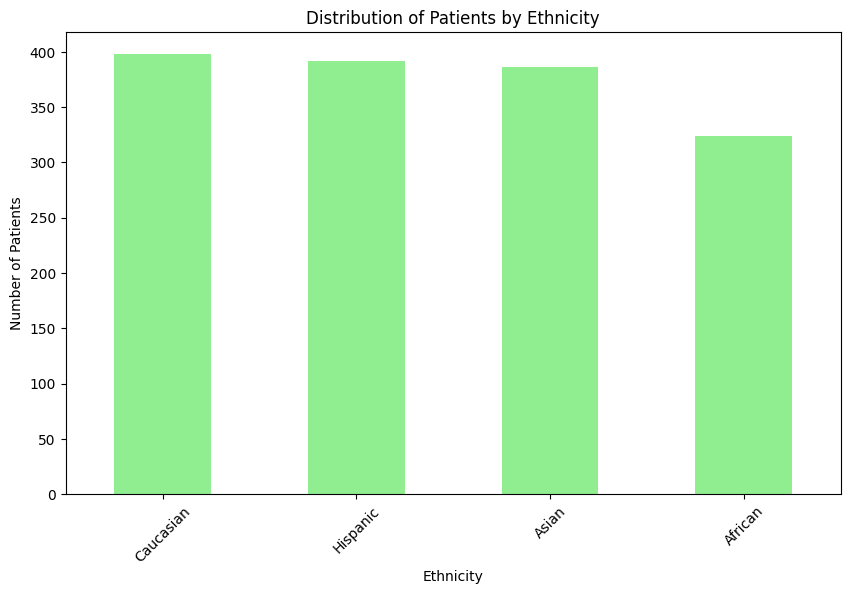

In [17]:
# Count the occurrences of each ethnicity
ethnicity_counts = df['Ethnicity'].value_counts()

# Bar chart for visualizing the ethnicities
plt.figure(figsize=(10, 6))
ethnicity_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients by Ethnicity')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [18]:
import plotly.express as px

# Sample mapping of ethnicities to countries (this needs to be tailored to your dataset)
ethnicity_to_country = {
    'Caucasian': 'United States', 
    'Hispanic': 'Mexico', 
    'Asian': 'China', 
    'African American': 'Nigeria', 
    'Other': 'India'
}

# Create a new column mapping ethnicities to countries
df['Country'] = df['Ethnicity'].map(ethnicity_to_country)

# Count the occurrences by country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Plot a choropleth map
fig = px.choropleth(country_counts, 
                    locations='Country', 
                    locationmode='country names',
                    color='Count',
                    hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Patient Distribution by Country (Based on Ethnicity)')
fig.show()

`Question 5:` What is the relationship between comorbid anxiety and depression among OCD patients?

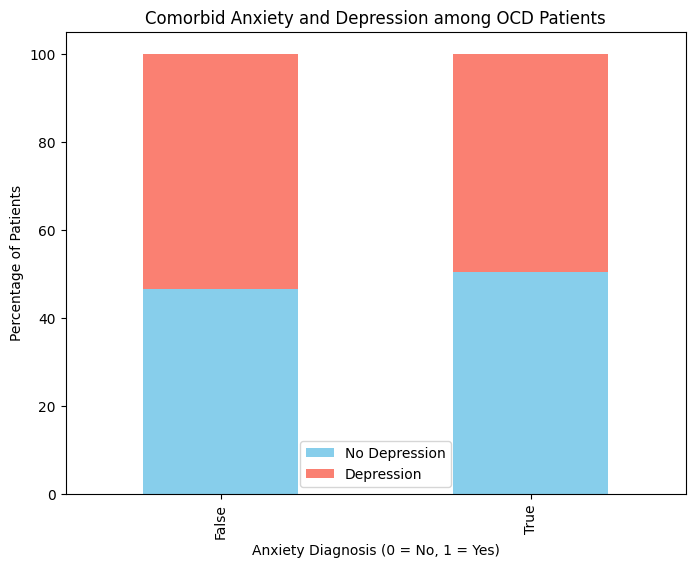

In [19]:
# Create a crosstab of anxiety diagnosis and depression diagnosis
anxiety_depression = pd.crosstab(df['Anxiety Diagnosis'], df['Depression Diagnosis'], normalize='index') * 100

# Plot a stacked bar chart
anxiety_depression.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8,6))
plt.title('Comorbid Anxiety and Depression among OCD Patients')
plt.xlabel('Anxiety Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Patients')
plt.legend(['No Depression', 'Depression'])
plt.show()

`Question 6:` Which types of compulsions are most associated with depression?

C:\Users\katja\AppData\Local\Temp\ipykernel_63920\4065758830.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




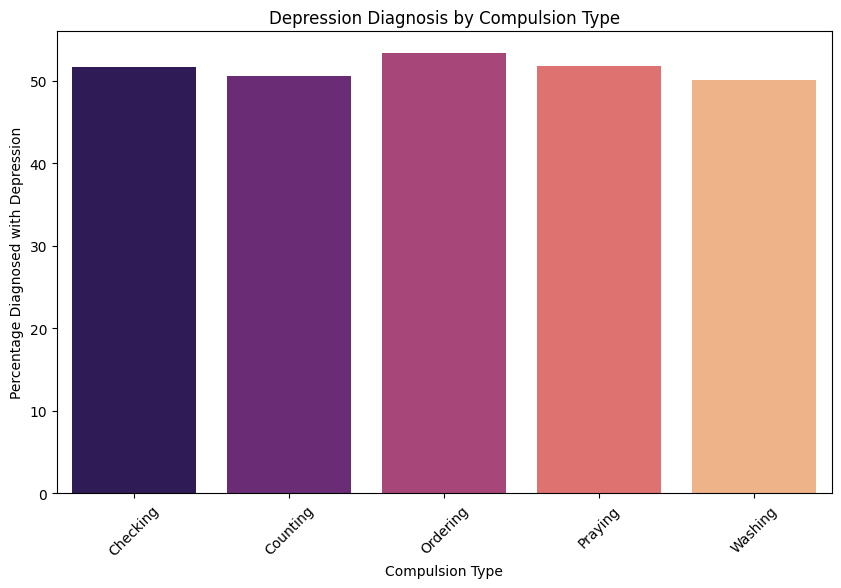

In [20]:
# Group by compulsion type and calculate the percentage of patients with depression
compulsion_depression = df.groupby('Compulsion Type')['Depression Diagnosis'].mean() * 100

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=compulsion_depression.index, y=compulsion_depression.values, palette='magma')
plt.title('Depression Diagnosis by Compulsion Type')
plt.xlabel('Compulsion Type')
plt.ylabel('Percentage Diagnosed with Depression')
plt.xticks(rotation=45)
plt.show()

`Question 7:` What medications are most commonly prescribed to OCD patients with depression, and how does this affect their depression status?

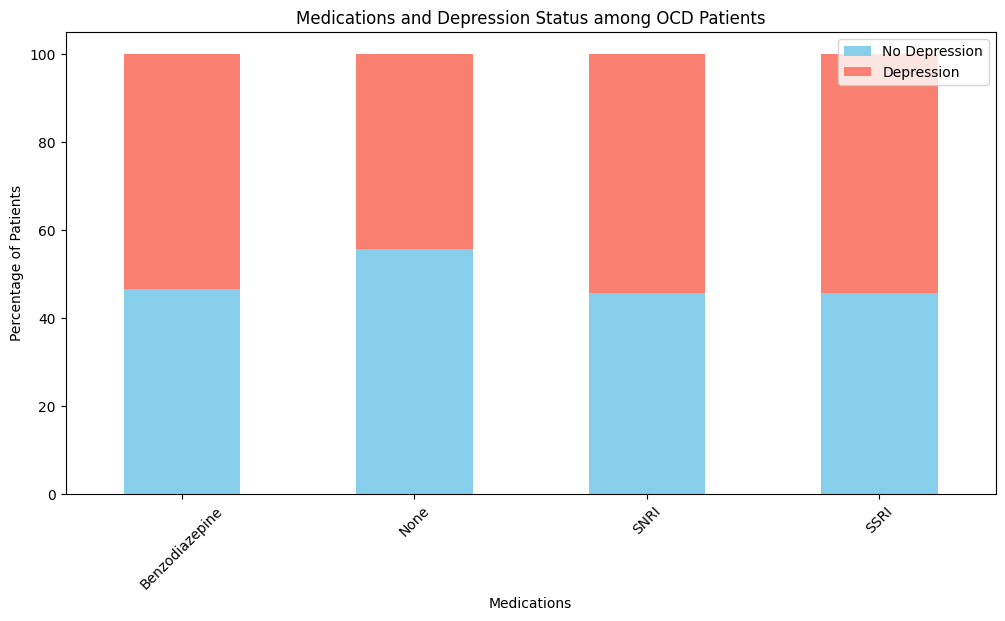

In [21]:
# Create a crosstab of medications and depression diagnosis
medications_depression = pd.crosstab(df['Medications'], df['Depression Diagnosis'], normalize='index') * 100

# Plot stacked bar chart
medications_depression.plot(kind='bar', stacked=True, figsize=(12,6), color=['skyblue', 'salmon'])
plt.title('Medications and Depression Status among OCD Patients')
plt.xlabel('Medications')
plt.ylabel('Percentage of Patients')
plt.legend(['No Depression', 'Depression'])
plt.xticks(rotation=45)
plt.show()

---

### Tab 2: Diagnostic Analytics

`Question 1:` Is there a significant correlation between the severity of OCD (Y-BOCS scores) and the likelihood of depression?

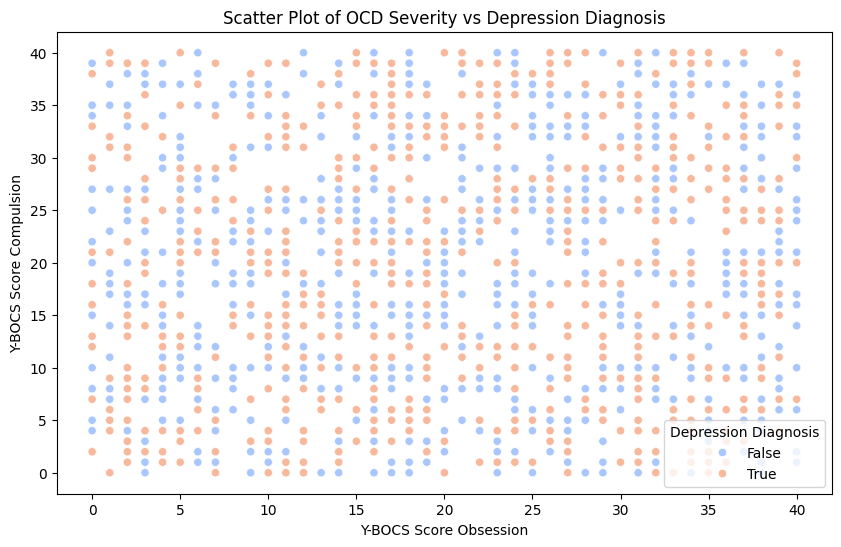

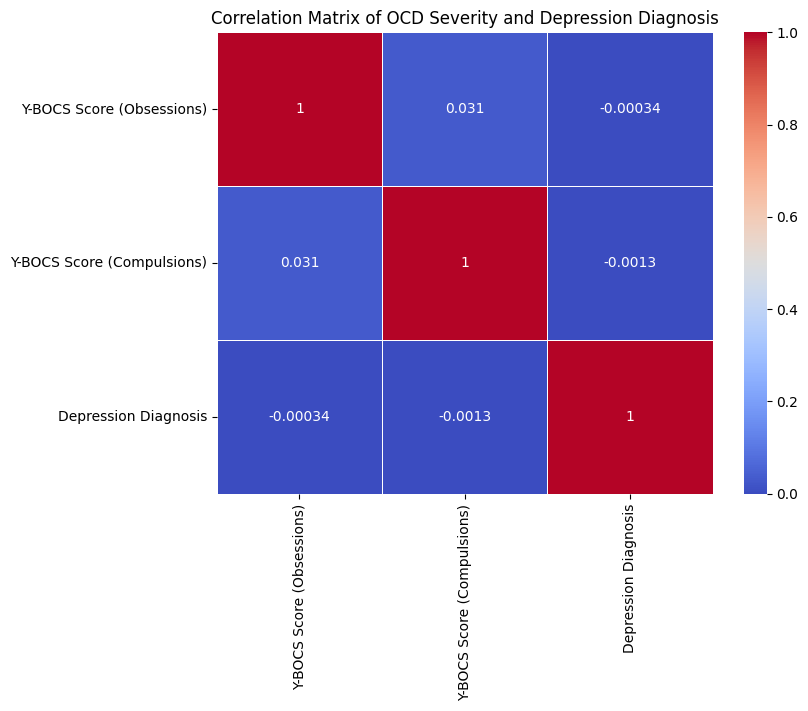

In [22]:
# Scatter plot for Y-BOCS scores (obsession and compulsion) vs depression diagnosis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Y-BOCS Score (Obsessions)', y='Y-BOCS Score (Compulsions)', hue='Depression Diagnosis', data=df, palette='coolwarm')
plt.title("Scatter Plot of OCD Severity vs Depression Diagnosis")
plt.xlabel("Y-BOCS Score Obsession")
plt.ylabel("Y-BOCS Score Compulsion")
plt.show()

# Correlation matrix for numerical variables
numerical_cols = ['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'Depression Diagnosis']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of OCD Severity and Depression Diagnosis")
plt.show()

`Question 2:` Do specific types of obsessions or compulsions increase the risk of depression in OCD patients?

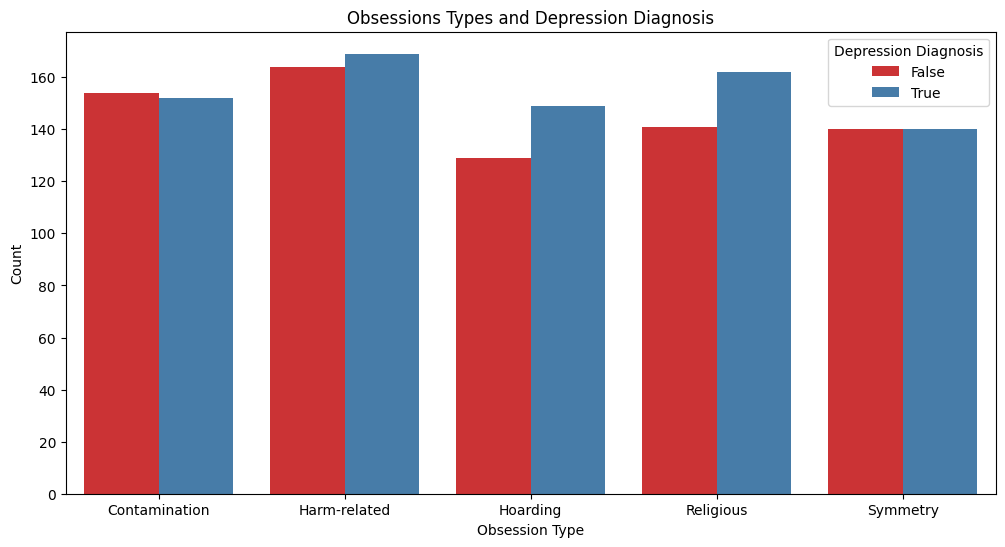

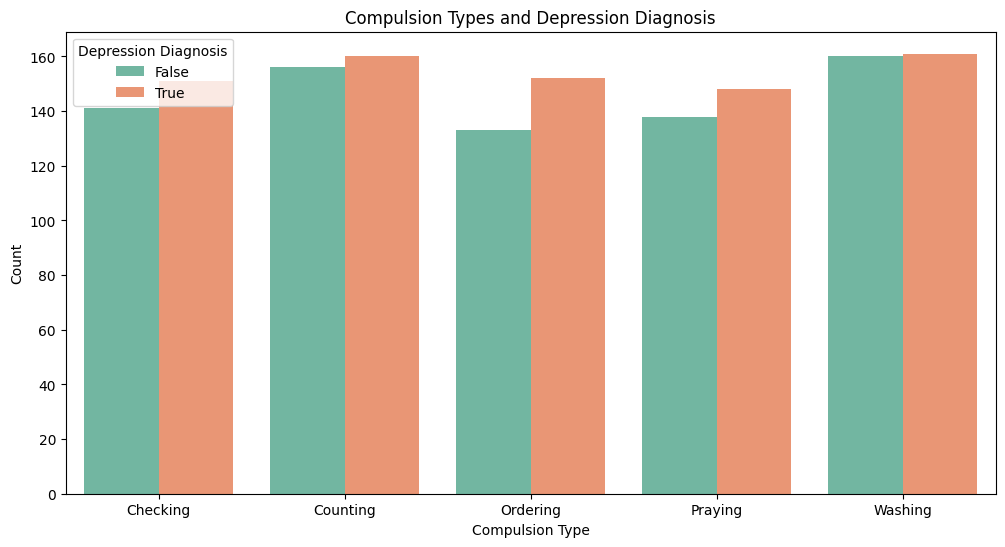

Chi-square test for obsession type vs depression diagnosis: p-value = 0.7919467244163001
Chi-square test for compulsion type vs depression diagnosis: p-value = 0.9485272704465695


In [23]:
import scipy.stats as stats

# Clustered bar chart for obsession and compulsion types vs depression diagnosis
plt.figure(figsize=(12, 6))
sns.countplot(x='Obsession Type', hue='Depression Diagnosis', data=df, palette='Set1')
plt.title("Obsessions Types and Depression Diagnosis")
plt.xlabel("Obsession Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Compulsion Type', hue='Depression Diagnosis', data=df, palette='Set2')
plt.title("Compulsion Types and Depression Diagnosis")
plt.xlabel("Compulsion Type")
plt.ylabel("Count")
plt.show()

# Chi-square test to check for dependency between obsession/compulsion type and depression
obsession_table = pd.crosstab(df['Obsession Type'], df['Depression Diagnosis'])
compulsion_table = pd.crosstab(df['Compulsion Type'], df['Depression Diagnosis'])

chi2_obs, p_obs, _, _ = stats.chi2_contingency(obsession_table)
chi2_comp, p_comp, _, _ = stats.chi2_contingency(compulsion_table)

print(f"Chi-square test for obsession type vs depression diagnosis: p-value = {p_obs}")
print(f"Chi-square test for compulsion type vs depression diagnosis: p-value = {p_comp}")

`Question 3:` Is there a relationship between a patient’s demographic factors (age, gender, ethnicity) and the likelihood of depression in OCD patients?

In [24]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Optimization terminated successfully.
         Current function value: 0.691644
         Iterations 4
                            Logit Regression Results                            
Dep. Variable:     Depression_Diagnosis   No. Observations:                 1500
Model:                            Logit   Df Residuals:                     1494
Method:                             MLE   Df Model:                            5
Date:                  Fri, 27 Sep 2024   Pseudo R-squ.:                0.001549
Time:                          10:39:22   Log-Likelihood:                -1037.5
converged:                         True   LL-Null:                       -1039.1
Covariance Type:              nonrobust   LLR p-value:                    0.6663
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0742      0.190      0.391      0.696  

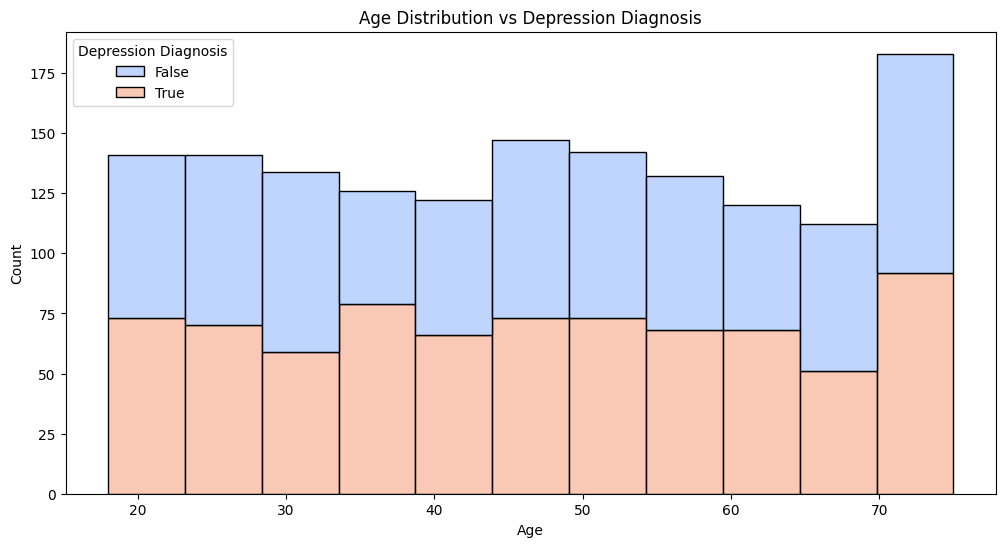

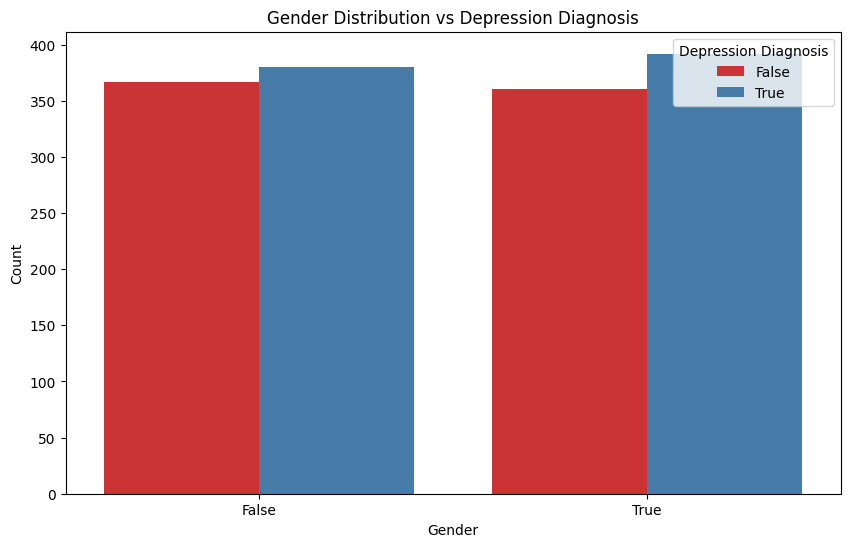

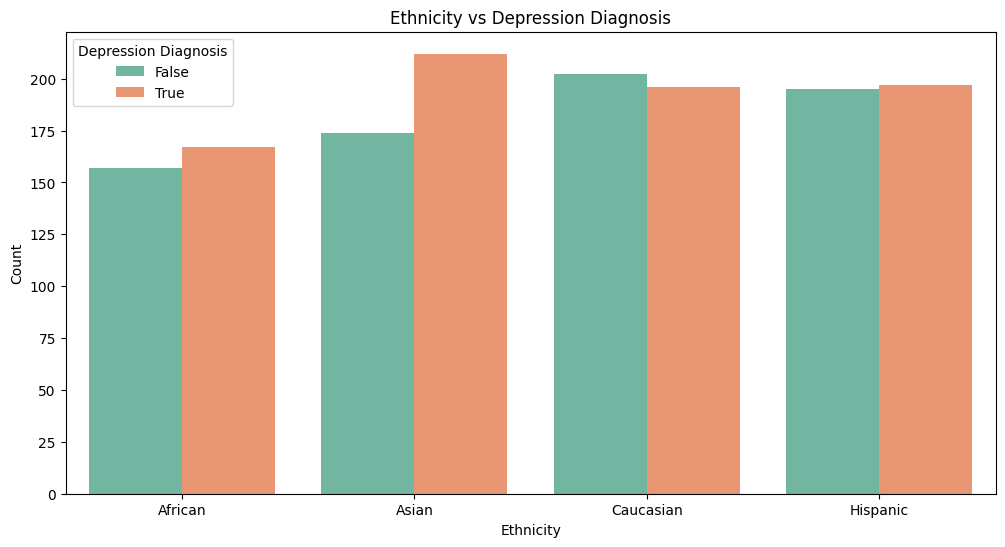

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

# Logistic regression to model the probability of depression based on age, gender, ethnicity
df['Depression_Diagnosis'] = df['Depression Diagnosis'].astype(int)  # Ensure it's numeric

# Prepare the logistic regression model
logit_model = logit('Depression_Diagnosis ~ Age + Gender + Ethnicity', data=df).fit()
print(logit_model.summary())

# Stacked bar chart for demographic factors vs depression diagnosis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Age", hue="Depression Diagnosis", multiple="stack", palette="coolwarm", binwidth=5)
plt.title("Age Distribution vs Depression Diagnosis")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Depression Diagnosis', data=df, palette='Set1')
plt.title("Gender Distribution vs Depression Diagnosis")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Ethnicity', hue='Depression Diagnosis', data=df, palette='Set2')
plt.title("Ethnicity vs Depression Diagnosis")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.show()

---

### Tab 3: Predictive Analytics

Input features:
- `age`
- `gender`
- `ethnicity`
- `martial status`
- `education level`
- `duration of symptoms`
- `previous diagnosis`
- `family history of OCD`
- `obsession type`
- `compulsion type`
- `Y-BOCS score obsession`
- `Y-BOCS score compulsion`
- `anxiety diagnosis`
- `medications`

Binary target class
- `Depression Diagnosis`

In [26]:
import numpy as np
# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)

In [27]:
# Drop columns which are not needed, only keep input features and the target variable
df.drop(columns=["Patient ID"], inplace=True)
df

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,age_group,Country,Depression_Diagnosis
0,32,False,African,Single,Some College,203,MDD,False,Harm-related,Checking,17,10,True,True,SNRI,31-45,NaN,1
1,69,True,African,Divorced,Some College,180,None,True,Harm-related,Washing,21,25,True,True,SSRI,60+,NaN,1
2,57,True,Hispanic,Divorced,College Degree,173,MDD,False,Contamination,Checking,3,4,False,False,Benzodiazepine,46-60,Mexico,0
3,27,False,Hispanic,Married,College Degree,126,PTSD,True,Symmetry,Washing,14,28,True,True,SSRI,19-30,Mexico,1
4,56,False,Hispanic,Married,High School,168,PTSD,True,Hoarding,Ordering,39,18,False,False,None,46-60,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,38,True,Hispanic,Divorced,College Degree,53,MDD,False,Contamination,Washing,21,33,True,True,SSRI,31-45,Mexico,1
1496,19,False,Hispanic,Divorced,Graduate Degree,160,GAD,True,Hoarding,Praying,25,16,True,True,SSRI,19-30,Mexico,1
1497,40,True,Asian,Married,Some College,100,None,True,Contamination,Counting,2,15,True,True,Benzodiazepine,31-45,China,1
1498,37,False,Caucasian,Married,Some College,210,GAD,True,Contamination,Washing,16,7,True,False,Benzodiazepine,31-45,United States,1
